# Kalman Filter

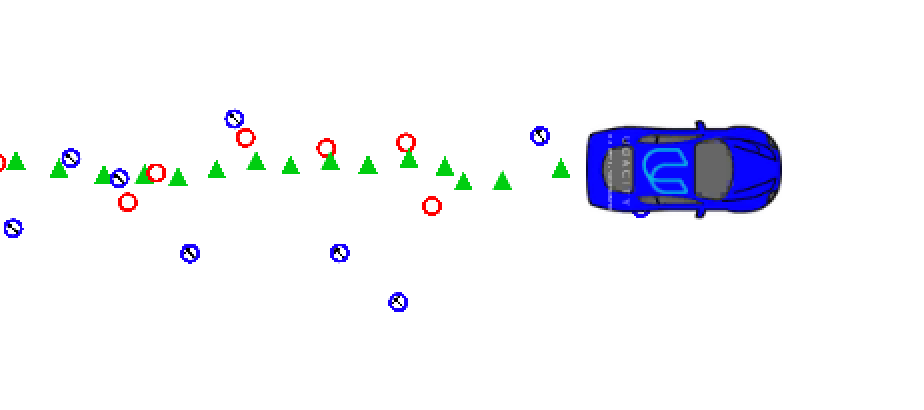

##### Introduction 
Kalman filters is used to estimate the next possible state of an object given its present state. The state variable may contain position, velocity (In case of Self driving cars in this project) and other kind of variable etc. This exercise is good for learning Kalman filters and a good exercise to code in C++. 

##### Algorithm
1. Initialize the initial position and velocity to the sensor measurements. 
2. Then initialize the matrices -> 
    1. Covariance matrix for LIDAR (R_laser_)
    2. Covariance matrix for RADAR (R_radar_)
3. Initialize the H matrix for the Laser sensor. For the Radar sensor this is calculated for every update. 
4. While(The vehicle is running):
    1. Calculate the time difference
    2. Predict step
        1. Update the transformation matrix (F_)
        2. Update the Q (Covariance) matrix (Q)
        3. Predict the next position of the object. 
    3. Update step
        1. We have two normal distributions now.
            1. Normal distribution of the measurement obtained from the sensor.
            2. Normal distribution of the predicted next position of the object.
        2. We calculate a new normal distribution from the above two normal distribution. 
        3. We update based upon the equations explained below. 


### Math Required

#### Covariance Update Rule
From the relation: Consider X as a random variable.
$$Cov(X) = E[(X-E[X])^{2}]$$
$$Cov(Ax) = E[(Ax - E(Ax))^{2}]$$
$$Cov(Ax) = E[(Ax-E[Ax])(Ax-E[Ax])^{T}]$$
$$ = E[(Ax-AE[x])(Ax-AE[x])^{T}] $$
$$ = E[A(x-E[x])(x-E[x])^{T}A^{T}] $$
$$ = AE[(x-E[x])(x-E[x])^{T}]A^{T} $$
$$ = A\Sigma A^{T} $$


#### Combining Two gaussians
Two gaussians with means $\mu_{0}$ and $\mu_{1}$ and standard deviations $\sigma_{0}$ and $\sigma_{1}$ are multiplied to obtain a gaussian with mean $\mu'$ and variance $\sigma'^{2}$.
$$N(x,\mu', \sigma'^{2}) = N(x,\mu_{0},\sigma_{0}^{2}).N(x,\mu_{1},\sigma_{1}^{2})$$
$$\mu' = \mu_{0} + \frac{\sigma_{0}^{2}(\mu_{1}-\mu_{0})}{\sigma_{0}^{2}+\sigma_{1}^{2}}$$
$$\sigma'^{2} = \sigma_{0}^{2} - \frac{\sigma_{0}^{4}}{\sigma_{0}^{2}+\sigma_{1}^{2}}$$
Consider the value $\frac{\sigma_{0}^{2}}{\sigma_{0}^{2}+\sigma_{1}^{2}}$ as "K" which is called as KALMAN GAIN. 
$$\mu' = \mu_{0} + k*(\mu_{1}-\mu_{0})$$
$$\sigma'^{2} = \sigma_{0}^{2} - k*\sigma_{0}^{2}$$

#### Probable Mistakes
1. Angle Normalization is very important. 
2. Consider that the value of $p_{x}*p_{x}+p_{y}*p_{y}$ can go to zeros. 

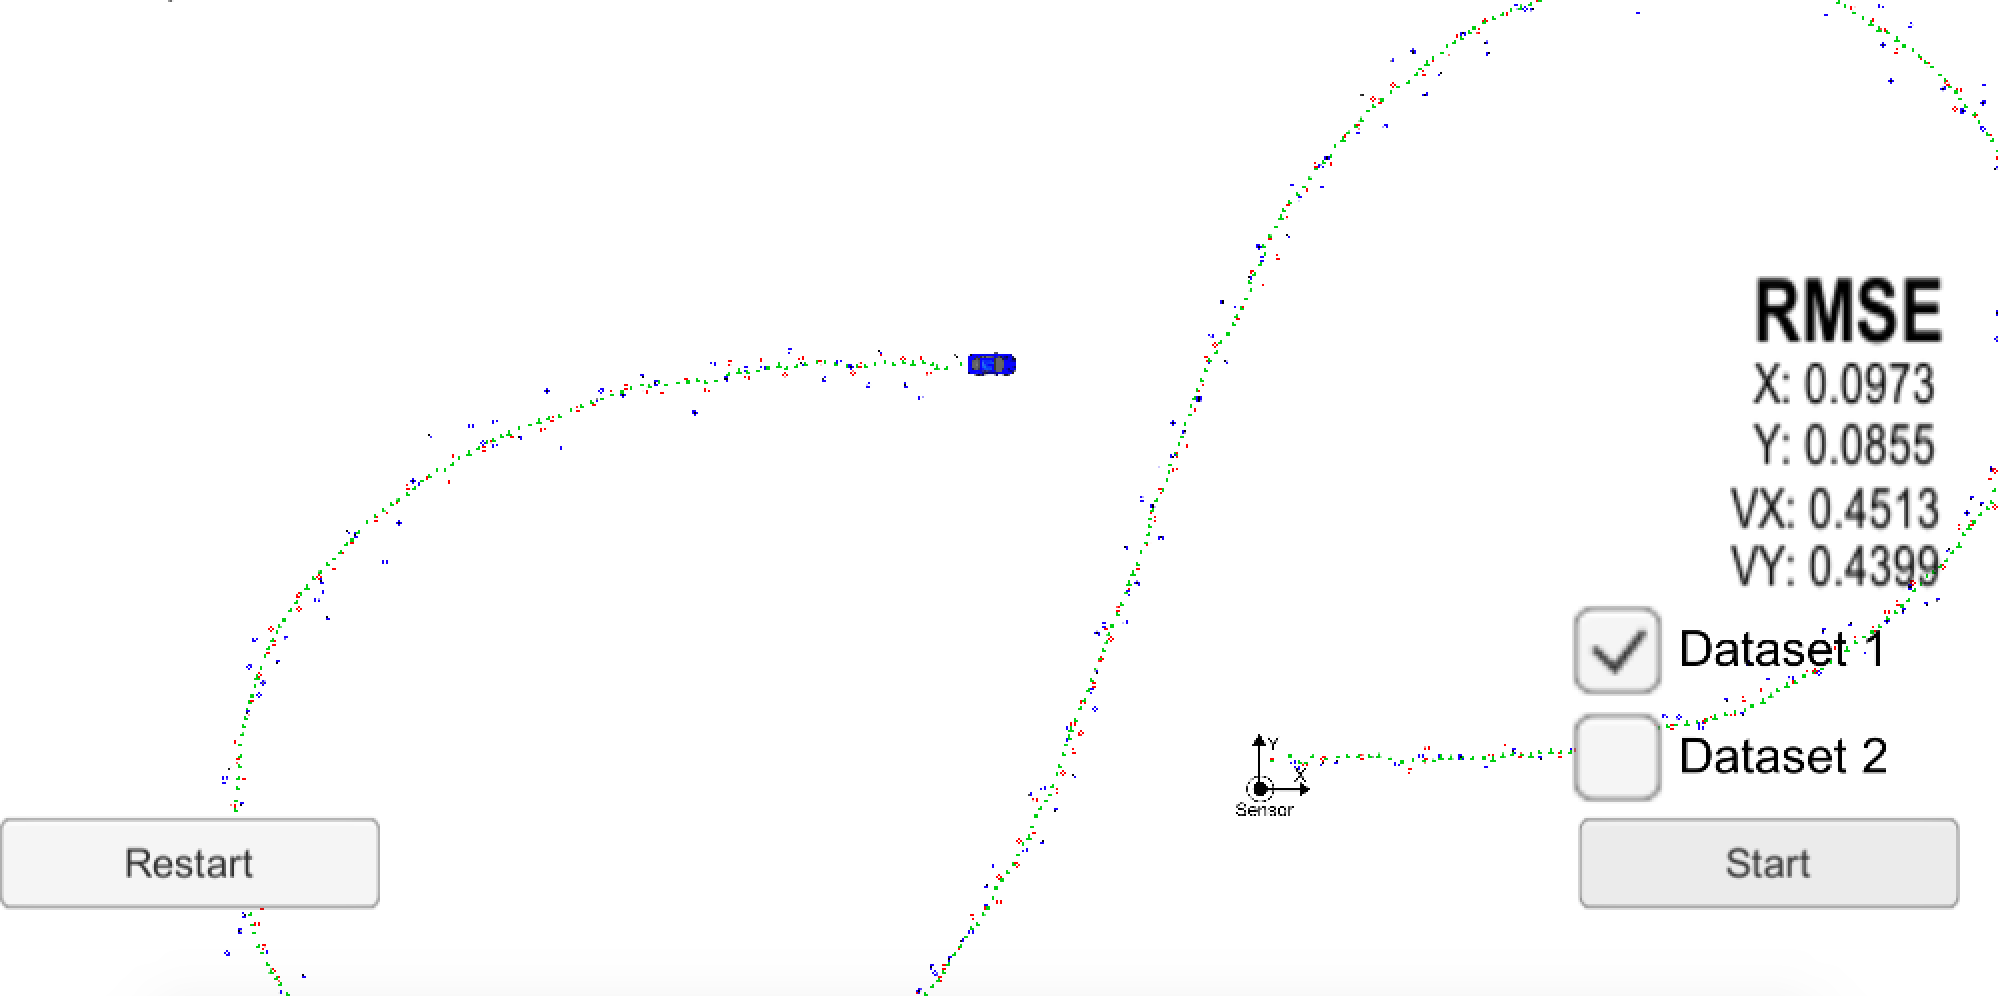